<a href="https://colab.research.google.com/github/Chai-9858/Chai-ML/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><font color=Blue>This is an implementation of linear regression using a single perceptron from scratch</font>



<h3><font color=pink>Importing the libraries:</font>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
x,y= make_regression(n_samples= 100, n_features= 1, noise = 10)
print(np.shape(x), np.shape(y))

(100, 1) (100,)


In [3]:
#reshaping y
y=y.reshape(len(y), 1)
print(np.shape(x), np.shape(y))

(100, 1) (100, 1)


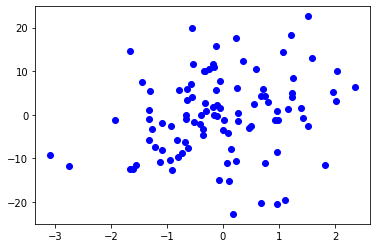

In [4]:
#plotting the data points
plt.scatter(x,y,c="b")

In [5]:
#Identity function (we're gonna use it as the activation function of the perceptron)
I=np.ones((len(x), 1))
print(np.shape(I))

(100, 1)


In [6]:
#Horizontally stacking a vector of ones with X
X=np.hstack((x,np.ones((len(x),1))))
print(np.shape(X))

(100, 2)


In [7]:
X

array([[-0.92466203,  1.        ],
       [-0.93752412,  1.        ],
       [ 0.96342577,  1.        ],
       [-0.25563978,  1.        ],
       [-0.15617263,  1.        ],
       [ 0.46142816,  1.        ],
       [-2.74821202,  1.        ],
       [ 2.04011339,  1.        ],
       [-1.26145534,  1.        ],
       [-0.12640518,  1.        ],
       [-1.32216382,  1.        ],
       [-0.18448156,  1.        ],
       [-0.38637181,  1.        ],
       [-0.17678871,  1.        ],
       [ 1.50921836,  1.        ],
       [-0.54679942,  1.        ],
       [-0.57374806,  1.        ],
       [ 1.23343702,  1.        ],
       [-0.11169904,  1.        ],
       [ 1.51815716,  1.        ],
       [ 0.75486819,  1.        ],
       [ 0.67798255,  1.        ],
       [ 1.15947626,  1.        ],
       [-1.60087377,  1.        ],
       [-0.34691334,  1.        ],
       [ 0.09038946,  1.        ],
       [-1.32300978,  1.        ],
       [-0.35853037,  1.        ],
       [-1.44328697,

In [8]:
#The weights initialized randomly
W= np.random.rand(2,1)
print(W)

[[0.42313664]
 [0.02997882]]


In [9]:
#The perceptron function
def agregation(X,W):
  return X.dot(W)

In [10]:
#Activation function:
def activation(Z):
  return Z

In [11]:
#the model
def perceptron(X,W):
  Z= agregation(X,W)
  a=activation(Z)
  return a

#Now let's see how our model is working with no cost function

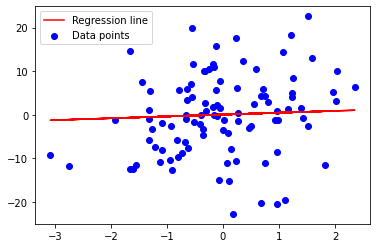

In [12]:
y_pred=perceptron(X,W)
plt.scatter(x,y, c ='b',label="Data points")
plt.plot(x,y_pred,c='r', label ="Regression line")
plt.legend()

# **The cost function**

We will be using the mean squared error function 

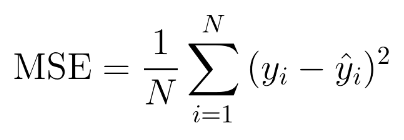

In [13]:
def fonctionCout(y,X,W):
  y_pred=perceptron(X,W)
  n=len(y)
  return (1/n)*np.sum((y_pred-y)**2)

In [14]:
fonctionCout(y,X,W)

84.46592257588198

# Gradient descent: 

Used to optimize our cost function

In [15]:
def gradient(y,X,W):
  
  n= len(y)

  term1= X.T
  term2= perceptron(X,W)-y
  return (2/n)*term1.dot(term2)

In [16]:
def descentGradient(y,X,W,learning_rate=0.1,nbr_iter=50000):
  for i in range(nbr_iter):
    W=W-learning_rate*gradient(y,X,W)
  return W


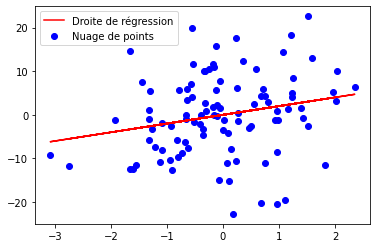

In [17]:
# we calculate Y_pred and plot the results
W_estim= descentGradient(y,X,W)

y_pred=perceptron(X,W_estim)

plt.scatter(x,y,c="b", label="Nuage de points")
plt.plot(x,y_pred,c="r", label= "Droite de régression")
plt.legend()

#The learning curve:

In [18]:
def descentGradientCout(y,X,W,learning_rate=0.1, nbr_iter=1000):
  loss = []
  for i in range(nbr_iter):
    W=W-learning_rate*gradient(y,X,W)
    loss.append(fonctionCout(y,X,W))    
  return W,loss

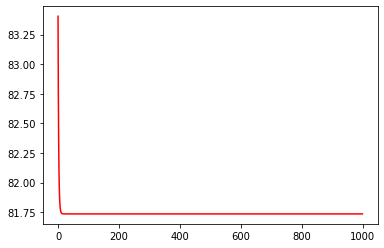

In [19]:
#plotting the learning curve
W_estim, loss=descentGradientCout(y,X,W, learning_rate=0.1, nbr_iter=1000)
plt.plot(loss, c="r")